In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline

# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

# 정규시즌 및 일자별 정규 시즌 데이터 활용하여 포지션별 연도별 성장률 분석

1. 데이터 전처리
2. 성장률 계산
3. 시각화

In [2]:
batter_data = pd.read_csv("Regular_Season_Batter.csv")
day_by_day_data = pd.read_csv("Regular_Season_Batter_Day_by_Day_b4.csv")

batter_data.head(), day_by_day_data.head()

(   batter_id batter_name  year team    avg    G   AB   R   H  2B  ...  GDP  \
 0          0        가르시아  2018   LG  0.339   50  183  27  62   9  ...    3   
 1          1         강경학  2011   한화  0.000    2    1   0   0   0  ...    0   
 2          1         강경학  2014   한화  0.221   41   86  11  19   2  ...    1   
 3          1         강경학  2015   한화  0.257  120  311  50  80   7  ...    3   
 4          1         강경학  2016   한화  0.158   46  101  16  16   3  ...    5   
 
      SLG    OBP   E  height/weight      year_born   position  \
 0  0.519  0.383   9     177cm/93kg  1985년 04월 12일  내야수(우투우타)   
 1  0.000  0.000   1     180cm/72kg  1992년 08월 11일  내야수(우투좌타)   
 2  0.349  0.337   6     180cm/72kg  1992년 08월 11일  내야수(우투좌타)   
 3  0.325  0.348  15     180cm/72kg  1992년 08월 11일  내야수(우투좌타)   
 4  0.257  0.232   7     180cm/72kg  1992년 08월 11일  내야수(우투좌타)   
 
                                    career  starting_salary    OPS  
 0  쿠바 Ciego de Avila Maximo Gomez Baez(대)              NaN  0.

In [12]:
batter_data['position'].unique()

array(['내야수(우투우타)', '내야수(우투좌타)', '외야수(우투좌타)', nan, '포수(우투우타)',
       '외야수(우투양타)', '외야수(우투우타)', '외야수(좌투좌타)', '포수(우투좌타)', '내야수(좌투좌타)',
       '내야수(우투양타)'], dtype=object)

### 데이터 구조
1. Regular_Season_Batter.csv
- batter_id, batter_name: 타자의 ID와 이름
- year, team: 연도와 소속 팀
- avg, G, AB, R, H 등: 타율, 경기 수, 타석 수, 득점, 안타 등의 성적 정보
- height/weight: 키와 몸무게
- year_born: 생년월일
- position: 포지션
- career: 경력
- starting_salary: 초봉 정보
- OPS: 출루율+장타율

2. Regular_Season_Batter_Day_by_Day_b4.csv
- batter_id, batter_name: 타자의 ID와 이름
- date: 경기 날짜
- opposing_team: 상대 팀
- avg1, AB, R, H 등: 해당 경기에서의 성적 정보
- avg2: 누적 타율
- year: 연도

### 데이터 전처리

In [3]:
# 주요 포지션 추출
batter_data['main_position'] = batter_data['position'].str.split('(').str[0]

# 관련 컬럼 선택
selected_data = batter_data[['year', 'main_position', 'avg']]

# 연도별 포지션('main_position')에 따른 평균 타율('avg') 계산
position_yearly_avg = selected_data.groupby(['year', 'main_position']).mean().reset_index()
position_yearly_avg

,year,main_position,avg
0,1999,내야수,0.292000
1,1999,외야수,0.258000
2,2000,내야수,0.267000
3,2000,외야수,0.247000
4,2001,내야수,0.294500
5,2001,외야수,0.242000
6,2001,포수,0.267000
7,2002,내야수,0.243000
8,2002,외야수,0.253600
9,2002,포수,0.179000


### 연도별 성장율 계산

In [5]:
position_yearly_avg['growth_rate'] = position_yearly_avg.groupby('main_position')['avg'].pct_change().fillna(0) * 100
position_yearly_avg

,year,main_position,avg,growth_rate
0,1999,내야수,0.292000,0.000000
1,1999,외야수,0.258000,0.000000
2,2000,내야수,0.267000,-8.561644
3,2000,외야수,0.247000,-4.263566
4,2001,내야수,0.294500,10.299625
5,2001,외야수,0.242000,-2.024291
6,2001,포수,0.267000,0.000000
7,2002,내야수,0.243000,-17.487267
8,2002,외야수,0.253600,4.793388
9,2002,포수,0.179000,-32.958801


### 시각화

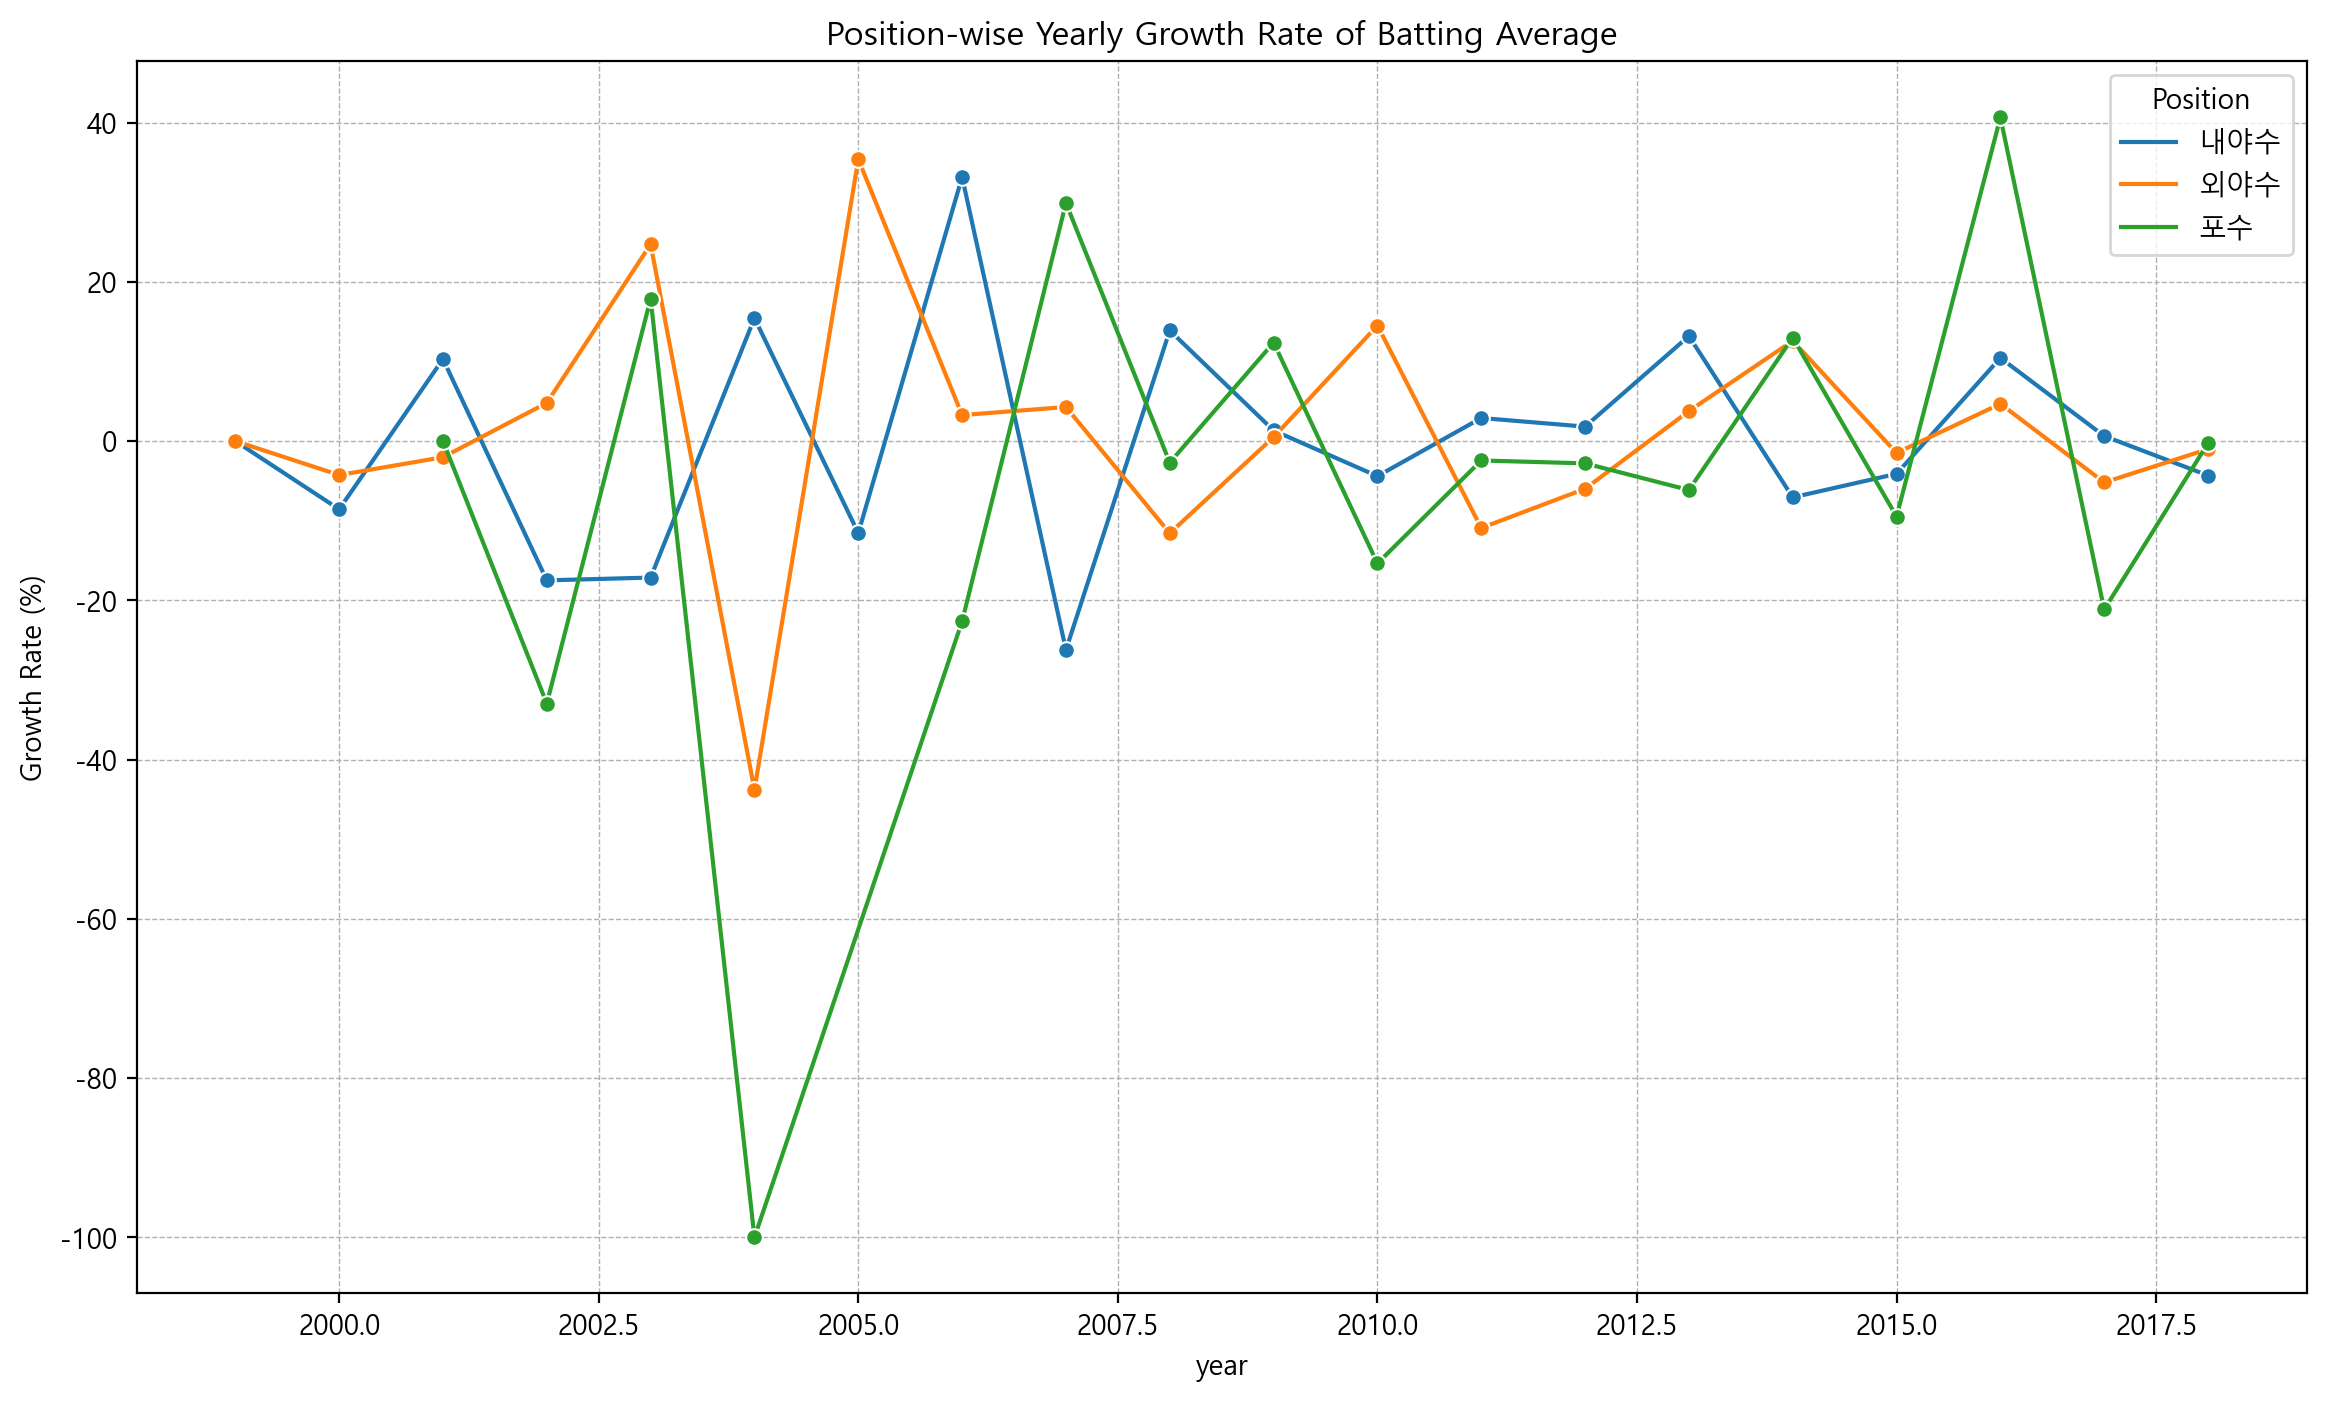

In [6]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=position_yearly_avg, x='year', y='growth_rate', hue='main_position', marker='o')
plt.title('Position-wise Yearly Growth Rate of Batting Average')
plt.ylabel('Growth Rate (%)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Position')
plt.show()

- 대체로 내야수와 외야수의 성장률은 비슷한 추세를 보임
- 특정 연도에 큰 성장율이나 감소율을 보이는 경우도 있으며, 이러한 부분은 추가적으로 연구가 필요
    - 특정 연도 주요 선수 분석 : 2000년도 초반과 2016년 포수 포지션에서 활약한 주요 선수들의 선수 성적 확인
    - 팀별 성적 분석하여 포수 포지션의 성장률이 특히 낮았던 연도와 높았던 연도 팀별 성적 확인
    - 외부 정보 조사가 필요할 것을 보임

In [19]:
# 2000년도 초반과 2016년 포수 선수들의 평균 성적 확인
catcher_data = batter_data[(batter_data['main_position'] == '포수') & (batter_data['year'].isin([2000, 2001, 2002, 2003, 2004, 2005, 2016]))]

catcher_yearly_avg = catcher_data.groupby('year').mean().reset_index()

catcher_yearly_avg[['year', 'avg']]

C:\Users\GM220808\AppData\Local\Temp\ipykernel_13912\1132078367.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  catcher_yearly_avg = catcher_data.groupby('year').mean().reset_index()


,year,avg
0,2001,0.267000
1,2002,0.179000
2,2003,0.211000
3,2004,0.000000
4,2005,0.243000
5,2016,0.289417


In [14]:
# 2004년 main_position == 포수 데이터 확인
batter_data[(batter_data['main_position'] == '포수') & (batter_data['year'].isin([2004]))]

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,main_position
42,4,강민호,2004,롯데,0.0,3,5,0,0,0,...,0.0,0.0,1,185cm/100kg,1985년 08월 18일,포수(우투우타),제주신광초-포철중-포철공고-(국제디지털대)-롯데,9000만원,0.0,포수


- 2002년 포수 선수들의 평균 타율이 크게 감소. 또한 2004년 포수 데이터 1개 뿐

In [16]:
# 2016년 주요 포수 선수들의 성적을 확인, 개별 선수의 성적이 전체 성장률에 어떤 영향을 주었는지 확인

# 2000~2004년 2016년 경기수를 기준으로 상위 포수 추출
top_catchers = catcher_data[catcher_data['G'] > catcher_data['G'].mean()]

top_catchers_sorted = top_catchers.sort_values(by=['year', 'avg'], ascending=[True, False])

top_catchers_sorted[['year', 'batter_name', 'G', 'avg']]

,year,batter_name,G,avg
43,2005,강민호,104,0.243
54,2016,강민호,116,0.323
1203,2016,양의지,108,0.319
1671,2016,이지영,129,0.297
1627,2016,이재원,130,0.290
1299,2016,유강남,100,0.266
1767,2016,이흥련,85,0.260
322,2016,김민식,88,0.257
777,2016,박동원,127,0.248
1507,2016,이성우,55,0.211


- 대부분의 주요 포수 선수들이 평균 이상의 타율을 기록
- 특히 강민호와 양의지는 0.320 이상의 높은 타율을 기록
    - 이로 인해 2016년 포수 포지션의 성장률이 높게 나타났을 가능성이 있음

In [18]:
# 2000~2004년 상위 포수 추출
early_2000s_catchers = catcher_data[catcher_data['year'].isin([2001, 2002, 2003, 2004]) & (catcher_data['G'] > catcher_data['G'].mean())]

# 연도별, 타율별 데이터 정렬
early_2000s_catchers_sorted = early_2000s_catchers.sort_values(by=['year', 'avg'], ascending=[True, False])

early_2000s_catchers_sorted[['year', 'batter_name', 'G', 'avg']]

,year,batter_name,G,avg


- 2000년대 초반의 주요 포수 선수들의 데이터가 포함되지 않았음

# 정규시즌, 정규시즌 일자 별 데이터를 활용하여 2010년도 이후 포지션별 평균 성적 비교

In [32]:
# 2010년 이후 데이터 필터링
filtered_batter_data = batter_data[batter_data['year'] >= 2010]

# 포지션 별 타격성적 평균 계산
position_avg = filtered_batter_data.groupby('position').mean()

# 비교위해 타격지표 추출
stats_to_compare = ['avg', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'SO', 'SLG', 'OBP', 'OPS']

# Calculate the average statistics by position for the selected stats
position_avg_comparison = filtered_batter_data.groupby('position')[stats_to_compare].mean()

position_avg_comparison

C:\Users\GM220808\AppData\Local\Temp\ipykernel_13912\59750226.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  position_avg = filtered_batter_data.groupby('position').mean()


,avg,R,H,2B,3B,HR,RBI,SB,SO,SLG,OBP,OPS
position,,,,,,,,,,,,
내야수(우투양타),0.094833,4.000000,5.714286,1.142857,0.285714,0.285714,2.428571,1.000000,8.285714,0.150333,0.124667,0.275000
내야수(우투우타),0.245582,34.740175,65.989083,12.006550,0.812227,7.347162,35.026201,4.890830,44.628821,0.368486,0.316998,0.683982
내야수(우투좌타),0.257208,32.616000,56.024000,9.624000,1.928000,3.280000,23.440000,7.640000,41.992000,0.352656,0.321544,0.674200
내야수(좌투좌타),0.272741,42.444444,87.259259,16.000000,0.925926,12.666667,53.407407,2.296296,73.481481,0.448630,0.350000,0.798630
외야수(우투양타),0.232286,31.285714,49.285714,10.714286,0.571429,9.857143,31.000000,3.571429,42.000000,0.398143,0.299571,0.697714
외야수(우투우타),0.246204,33.094241,61.424084,11.219895,0.801047,6.717277,32.094241,4.989529,41.319372,0.364136,0.312597,0.676733
외야수(우투좌타),0.246013,44.655844,77.103896,13.870130,1.759740,8.318182,39.837662,7.883117,51.058442,0.367242,0.321098,0.688340
외야수(좌투좌타),0.257908,42.528169,74.985915,11.359155,1.964789,3.521127,29.471831,11.387324,44.880282,0.345183,0.326901,0.672085
포수(우투우타),0.230168,17.269939,38.398773,6.760736,0.251534,4.337423,20.472393,0.748466,31.582822,0.324975,0.291660,0.612236


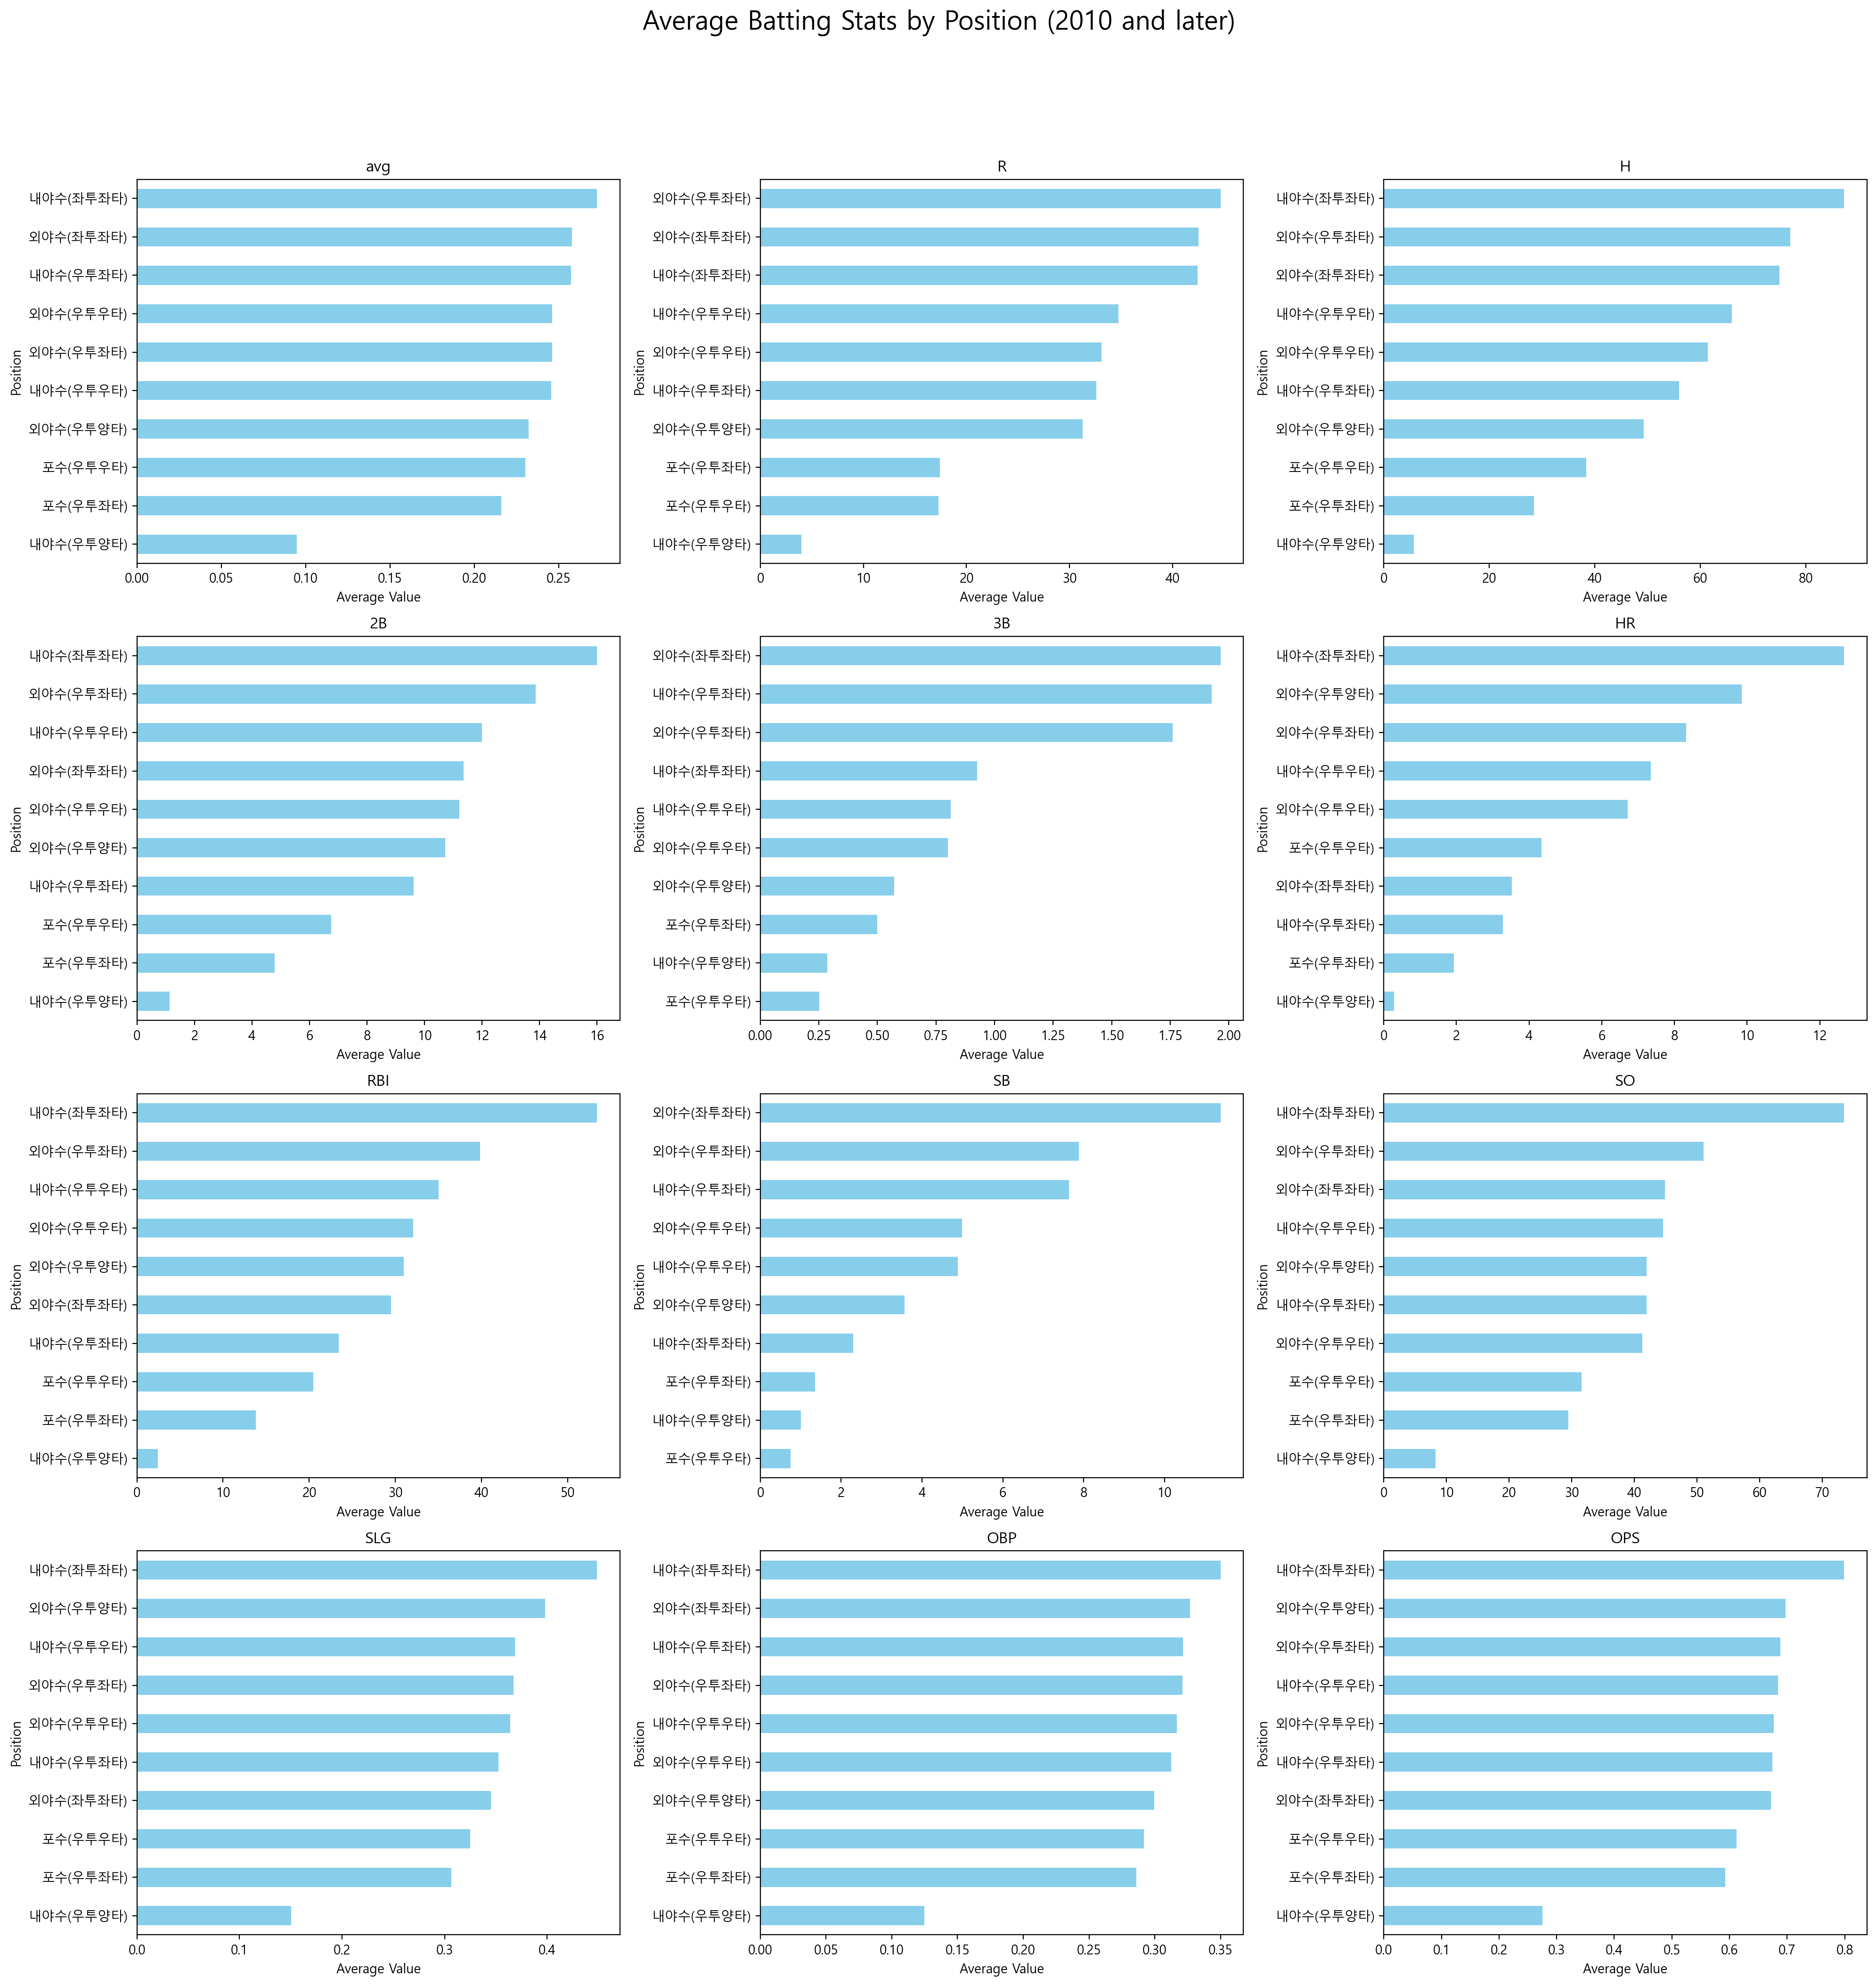

In [33]:
# Visualize the average statistics by position for each stat
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
fig.suptitle('Average Batting Stats by Position (2010 and later)', fontsize=20, y=1.05)

for i, ax in enumerate(axes.flatten()):
    stat = stats_to_compare[i]
    position_avg_comparison[stat].sort_values().plot(kind='barh', ax=ax, color='skyblue')
    ax.set_title(stat)
    ax.set_xlabel('Average Value')
    ax.set_ylabel('Position')

plt.tight_layout()
plt.show()

- 'avg'(타율)에서 '내야수(좌투좌타)' 포지션이 가장 높은 평균 타율을 보이며, '내야수(우투양타)' 포지션이 가장 낮은 평균 타율을 보임
- 'HR'(홈런) 지표는 내야수(좌투좌타)포지션이 가장 높은 평균 홈런 수를 보임

### 포지션 별 가장 높은, 낮은 타격 지표 비교

In [25]:
# 포지션 컬럼 제외 재계산
highest_stat = relevant_stats.drop(columns='position').idxmax(axis=0)
lowest_stat = relevant_stats.drop(columns='position').idxmin(axis=0)

# 가장 높은 통계와 가장 낮은 통계의 포지션 명 추출
highest_positions = relevant_stats['position'][highest_stat].values
lowest_positions = relevant_stats['position'][lowest_stat].values

# 데이터프레임으로 합침
comparison_df = pd.DataFrame({
    'Statistic': highest_stat.index,
    'Highest Value Position': highest_positions,
    'Lowest Value Position': lowest_positions
})

comparison_df

,Statistic,Highest Value Position,Lowest Value Position
0,avg,내야수(좌투좌타),내야수(우투양타)
1,R,외야수(우투좌타),내야수(우투양타)
2,H,내야수(좌투좌타),내야수(우투양타)
3,2B,내야수(좌투좌타),내야수(우투양타)
4,3B,외야수(좌투좌타),포수(우투우타)
5,HR,내야수(좌투좌타),내야수(우투양타)
6,RBI,내야수(좌투좌타),내야수(우투양타)
7,SB,외야수(좌투좌타),포수(우투우타)
8,CS,외야수(좌투좌타),내야수(우투양타)
9,BB,내야수(좌투좌타),내야수(우투양타)
